#### y= a0+a1x+ ε 
    - a0= It is the intercept of the Regression line (can be obtained putting x=0)
    - a1= It is the slope of the regression line, which tells whether the line is increasing or decreasing.
    - ε = The error term. (For a good model it will be negligible)
### Problem Statement example for Simple Linear Regression:
    - Here we are taking a dataset that has two variables: salary(dependant variable) and experience (independant variable)
    - The goal of the problem is:
          - We want to find out any correlation between these variables
          - Will find the best fit for the dataset
          - How dependant variable is changing by changing independant variable
          
       
    
       
       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

C:\Users\rn61\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
#Drop Unnamed column

df = df.drop('Unnamed: 0',axis = 1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Data Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.shape

(30, 2)

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Data Visualization

Text(0, 0.5, 'Frequency')

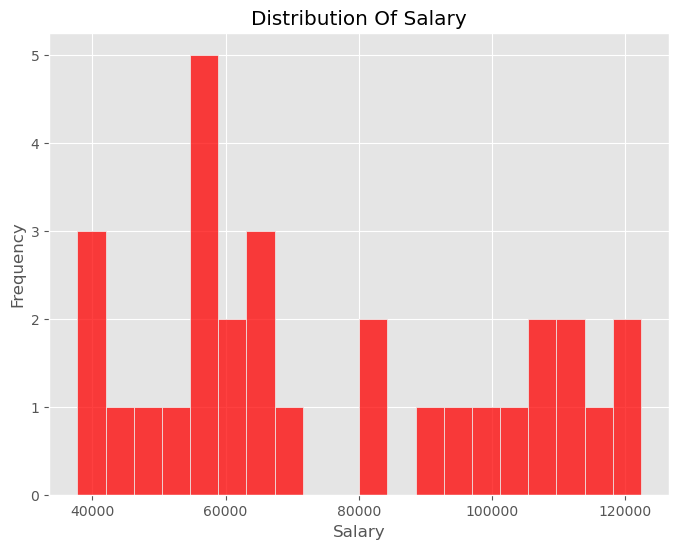

In [9]:
plt.figure(figsize = (8,6))
sns.histplot(df['Salary'],bins = 20,color = "red")
plt.title("Distribution Of Salary")
plt.xlabel('Salary')
plt.ylabel('Frequency')

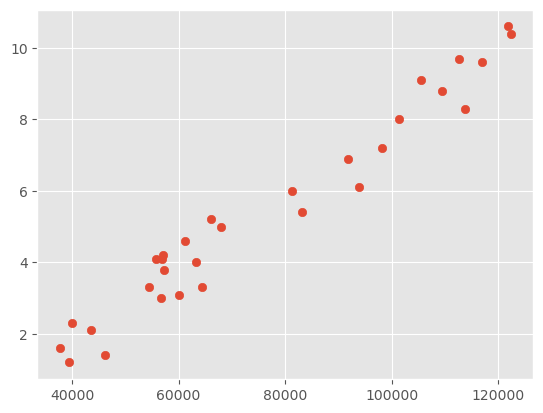

In [10]:
plt.scatter(df["Salary"],df["YearsExperience"])

In [11]:
mean = df.mean()
mean

YearsExperience        5.413333
Salary             76004.000000
dtype: float64

In [12]:
#correlation plot
corr=df.corr()
corr
#sns.heatmap(corr,annot=True,cmap = 'Wistia')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

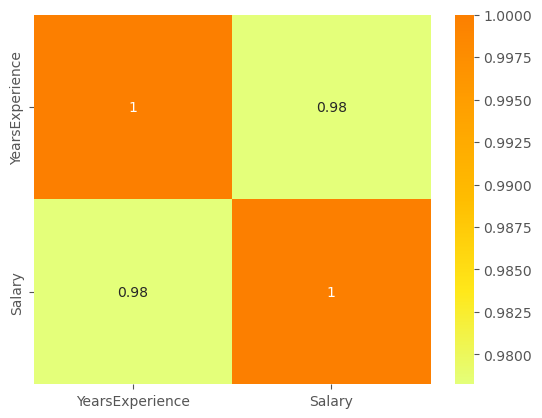

In [13]:
#correlation plot
corr=df.corr()
sns.heatmap(corr,annot=True,cmap = 'Wistia')

In [14]:
x= df.iloc[:, :-1].values  
y= df.iloc[:, 1].values 


In [15]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, random_state=0)


In [16]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(x_train, y_train)  


LinearRegression()

In [21]:
#Prediction of Test and Training set result  
y_pred = regressor.predict(x_test)  
x_pred = regressor.predict(x_train)  


In [18]:
 y_test

array([ 37732., 122392.,  57082.,  63219., 116970., 109432., 112636.,
        55795.,  83089., 101303.])

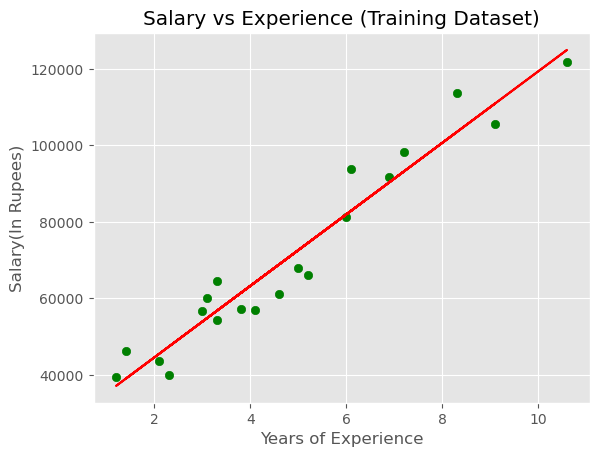

In [19]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train,x_pred,color = "red")
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   